自定义函数

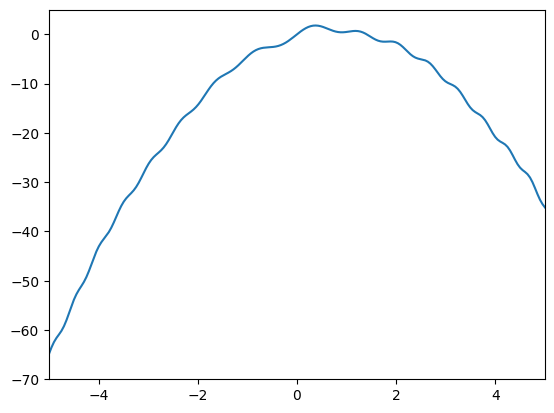

In [316]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def f(x):
    return 3 * x - 2 * x ** 2  + np.sin(5*x) * np.cos(x**2)

x_data = np.linspace(-5, 5, 200)
y_data = f(x_data)

plt.axis([-5, 5, -70, 5])
plt.plot(x_data, y_data)
plt.show()

In [317]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    inputs = tf.cast(inputs, tf.float32)
    Weights = tf.Variable(shape=[in_size, out_size], dtype=tf.float32,initial_value=tf.random.uniform(shape=[in_size, out_size],
                          minval=-0.1, maxval=0.1))
    biases = tf.Variable(shape=[out_size], dtype=tf.float32, initial_value=tf.zeros(out_size))
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs


In [318]:
x_data = x_data.reshape(-1, 1)
# add hidden layer
l1 = add_layer(x_data, 1, 128, activation_function=tf.nn.relu)
l2 = add_layer(l1,128, 16, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l2, 16, 1, activation_function=None)
 
# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data - prediction),axis=1))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.005).minimize(loss)
 
# important step
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.compat.v1.initialize_all_variables()
else:
    init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)

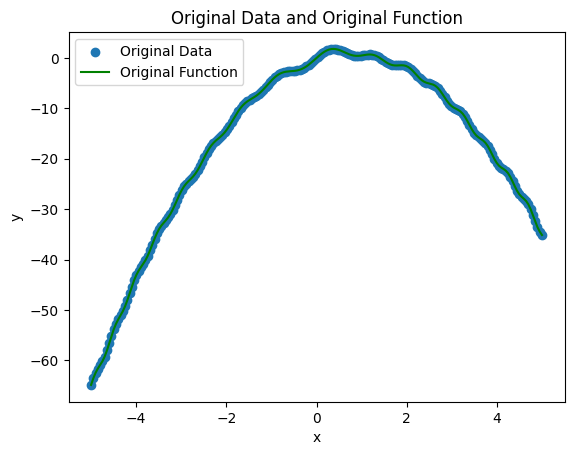

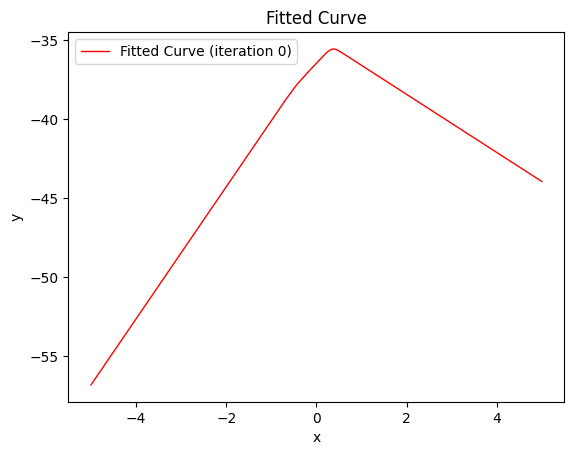

In [319]:
# Create a new figure for original data and function
plt.figure()

# Plot the real data
plt.scatter(x_data, y_data, label='Original Data')

# Plot the original function
x_range = np.linspace(-5, 5, 200)
plt.plot(x_range, f(x_range), 'g-', label='Original Function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Data and Original Function')
plt.legend()
plt.show()

# Create a new figure for the fitted curve
plt.figure()

# Train the model and plot the fitted curve
for i in range(1000):
    # training
    sess.run(optimizer)
    if i % 1000 == 0:
        prediction_value = sess.run(prediction)
        plt.plot(x_range, prediction_value.flatten(), 'r-', lw=1, label='Fitted Curve (iteration {})'.format(i))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Curve')
plt.legend()
plt.show()
